In [2]:
import xlwings as xw
from shapely.wkt import loads
import pandas as pd


In [110]:
zone_name = 'Зона 1'
current_point_name = '19а'

In [111]:
sheet = xw.sheets[zone_name]
zone_df = sheet.range('A1').expand().options(pd.DataFrame, header=1, index=False).value
zone_df['geometry'] = zone_df['geometry'].apply(loads)
zone_df['number_position'] = zone_df['number_position'].apply(loads)

current_point = zone_df['number_position'][zone_df['split_number'] == current_point_name].iloc[0]
points = zone_df['number_position'].tolist()
visited = []
while len(visited) < len(points):
    distances = [(idx, current_point.distance(pt)) for idx, pt in enumerate(points) if idx not in visited]
    nearest_idx = min(distances, key=lambda x: x[1])[0]
    visited.append(nearest_idx)
    current_point = points[nearest_idx]
zone_df['order'] = [visited.index(idx) + 1 for idx in range(len(points))]
    
zone_df

,index,split_number,number_position,type,geometry,size,order
0,0,3,POINT (3108.838205298518 1707.285109871409),Point,POINT (3108.838205298518 1707.285109871409),NaN,9
1,1,4,POINT (3114.150988844972 1707.4695572873902),Point,POINT (3114.150988844972 1707.4695572873902),NaN,8
2,2,5,POINT (3115.690642463274 1707.5867820573599),Point,POINT (3115.690642463274 1707.5867820573599),NaN,5
3,3,6,POINT (3115.1004453425708 1706.18062074892),Point,POINT (3115.1004453425708 1706.18062074892),NaN,6
4,4,7,POINT (3114.699609216242 1705.0905155704238),Point,POINT (3114.699609216242 1705.0905155704238),NaN,7
5,5,19а,POINT (3115.8767179014208 1710.2258575299381),Point,POINT (3115.8767179014208 1710.2258575299381),NaN,1
6,6,19б,POINT (3115.8767179014208 1710.2258575299381),Point,POINT (3115.8767179014208 1710.2258575299381),NaN,2
7,7,19в,POINT (3115.8767179014208 1710.2258575299381),Point,POINT (3115.8767179014208 1710.2258575299381),NaN,3
8,8,19г,POINT (3115.8767179014208 1710.2258575299381),Point,POINT (3115.8767179014208 1710.2258575299381),NaN,4
9,9,24,POINT (3105.0233167174188 1709.065127000339),Point,POINT (3105.0233167174188 1709.065127000339),NaN,10


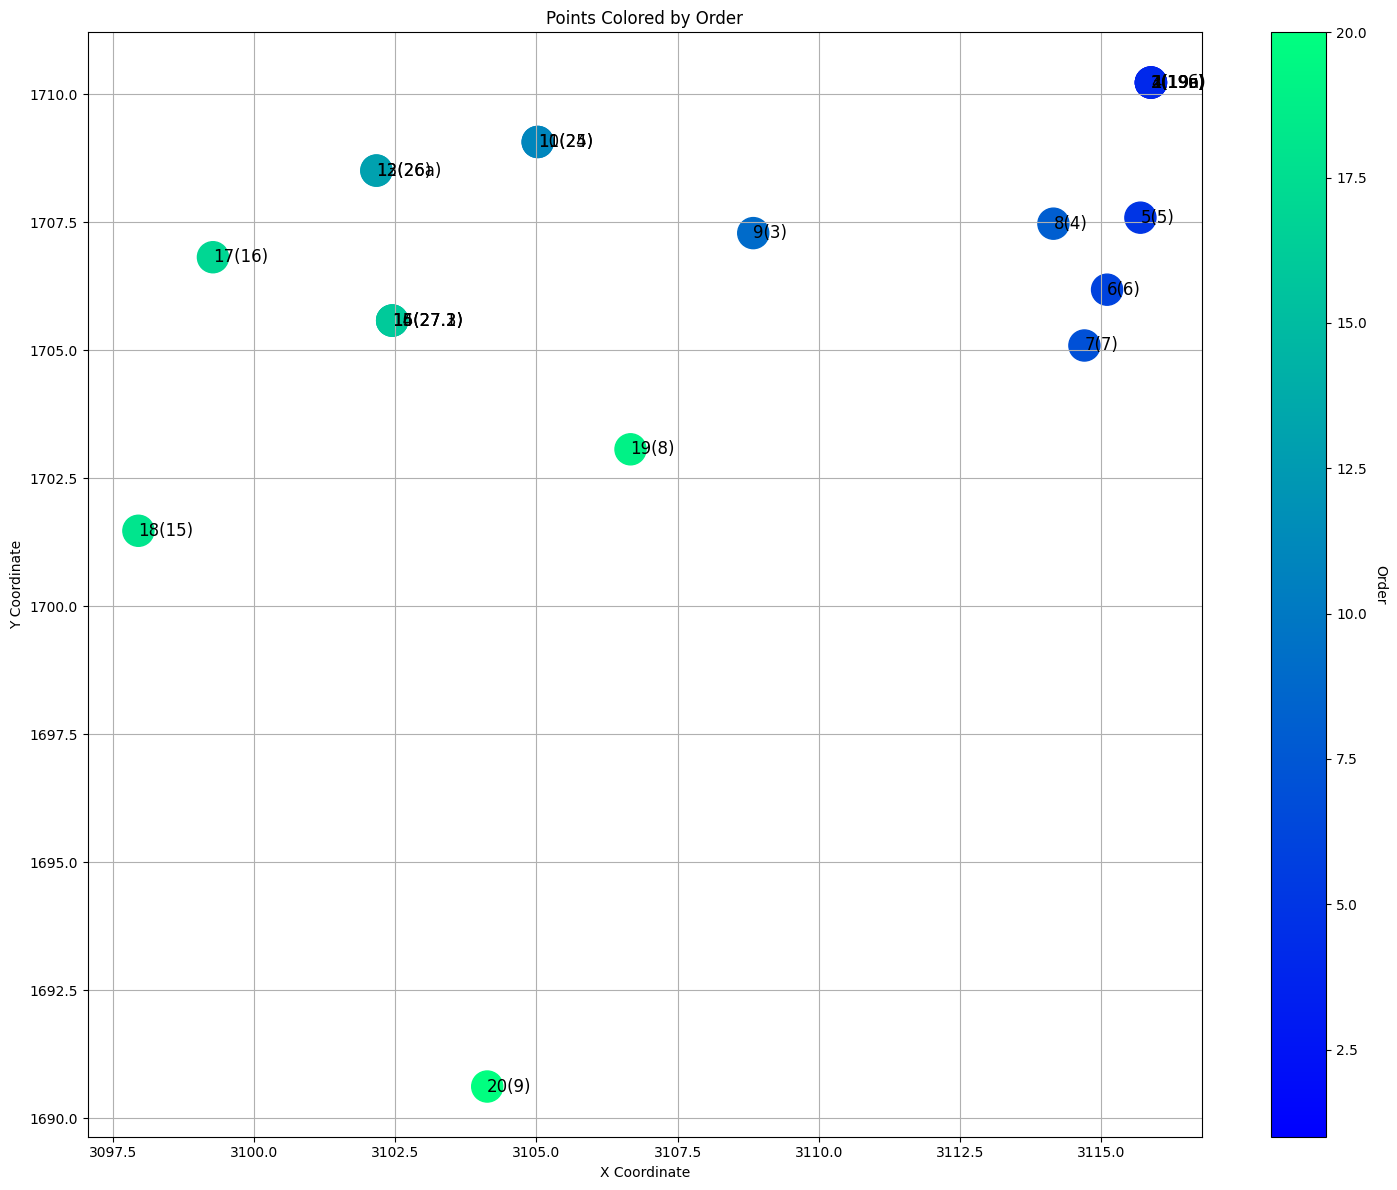

In [112]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_points(df):
    x_coords = [point.x for point in df['number_position']]
    y_coords = [point.y for point in df['number_position']]
    orders = df['order']
    numbers = df['split_number']
    
    cmap = mpl.colormaps['winter']
    norm = plt.Normalize(vmin=orders.min(), vmax=orders.max())
    
    plt.figure(figsize=(15, 12))
    scatter = plt.scatter(x_coords, y_coords, c=orders, s=500, cmap=cmap, norm=norm)
    for i, (x, y, order, number) in enumerate(zip(x_coords, y_coords, orders, numbers)):
        plt.text(x, y, f"{order}({number})", fontsize=12, ha='left', va='center', color='black')
    
    cbar = plt.colorbar(scatter, label='Order')
    cbar.ax.set_ylabel('Order', rotation=270, labelpad=15)
    
    plt.title('Points Colored by Order')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()

plot_points(zone_df)

Разделять только если количество в штуках и если:
несколько состояний
часть - пни, часть - нет

разделить ведомость на orm там где соединенные номера